In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='../input/apple-stock-prices/AAPL_data.csv', parse_dates=['date'], index_col=['date'],
                 usecols=['date', 'open', 'high', 'low', 'close', 'volume', ])
df.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='date', ylabel='volume'>

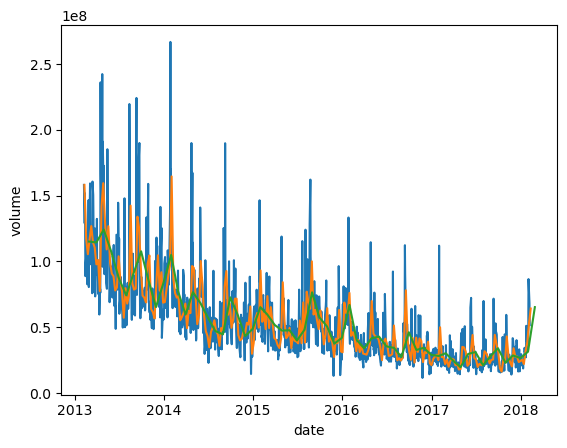

In [2]:
%matplotlib inline
from seaborn import lineplot
lineplot(data=df, x='date', y='volume')
lineplot(data=df.resample('W').mean(), x='date', y='volume')
lineplot(data=df.resample('M').mean(), x='date', y='volume')

Funny how volume seems to decline with time.

<Axes: xlabel='close', ylabel='volume'>

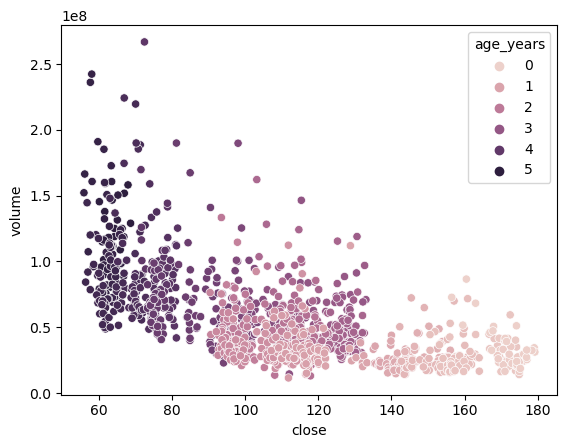

In [3]:
from seaborn import scatterplot
df['age_years'] = df.index.to_series().apply(lambda x: (df.index.to_series().max() - x).days / 365 )
scatterplot(data=df, x='close', y='volume', hue='age_years')

The volume/price scatter shows that as prices increase volume declines in pretty clear annual regimes.